## Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

#### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset:

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Exploratory Data Analysis (EDA):

In [3]:
# Checking for the shape of the dataset:

df.shape

(614, 13)

- There are 614 rows and 13 columns including the target column in the dataset.

- 'Loan_Status' is the target column.

In [4]:
# Checking the columns of the dataset:

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

###### Feature Columns:

1. Loan_ID : loan application id (unique for all applicant)

2. Gender : Gender of the applicant (male/female)

3. Married : marital status of the applicant (Yes/No)

4. Dependents : Number of dependents on the applicant

5. Education : Education level of the applicant

6. Self_Employed : Shows if the applicant is self employed or not

7. ApplicantIncome : Income of the applicant

8. CoapplicantIncome : Income of the coapplicant

9. LoanAmount : loan amount

10. Loan_Amount_Term : term of loan in months

11. Credit_History : credit history of the applicant

12. Property_Area : property area of the applicant (Urban/Semi-urban/rural)

##### Target Column:

- Loan_Status : the  loan is approved or not.

In [5]:
# Checking the data type of the dataset

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Checking for the missing values in the dataset

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There are missing values in the dataset.

In [7]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Observations from the above table:

    - There are missing values in the dataset as said earlier.
    - 8 out of 13 columns are of object datatype.
    - 4 columns are of float datatype.
    - 1 column is of interger datatype.

#### Analyzing the target column:

In [8]:
# Checking for the value counts.

df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

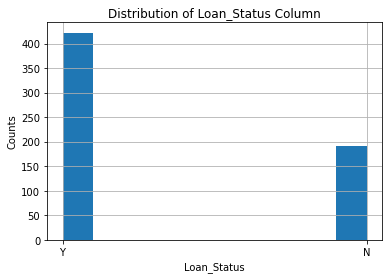

In [9]:
# Plotting histogram to show the distribution of data in the target coulmn.

df['Loan_Status'].hist(grid=True)
plt.ylabel('Counts')
plt.xlabel('Loan_Status')
plt.title('Distribution of Loan_Status Column')
plt.show()

- The above observation shows that the target column is imbalance.

- We'll balance the target coulmn later.

#### Handling the missing values:

1. Gender

We'll replace the null values of the Gender column with the mode.

In [10]:
# Checking for the values counts

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

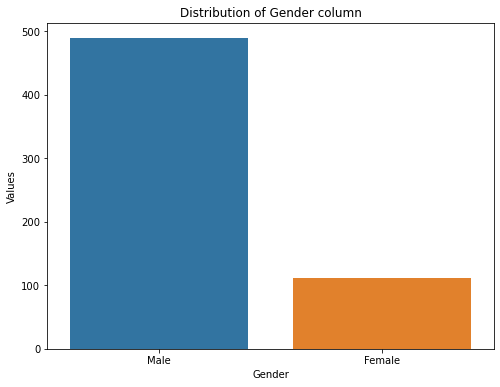

In [11]:
#plotting graph to show the value counts of Gender column

plt.figure(figsize=[8,6])
sns.countplot(x='Gender', data=df)
plt.ylabel('Values')
plt.xlabel('Gender')
plt.title('Distribution of Gender column')
plt.show()

- We observe that the number of males are more in the dataset. So, we'll replace the missing values with Male.

In [12]:
# Replacing missing values
df['Gender'].fillna('Male', inplace=True)

2. Married

We'll replace the missing values of the Married column with the mode.

In [13]:
# Checking for the values count.

df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

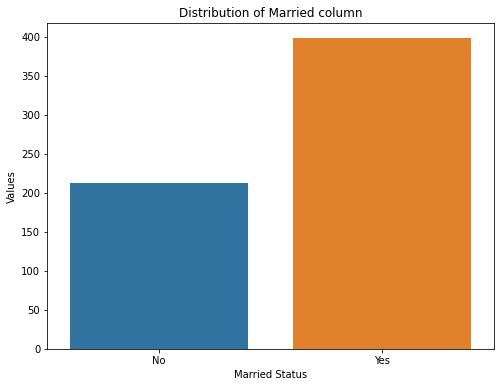

In [14]:
#plotting graph to show the value counts of Married column

plt.figure(figsize=[8,6])
sns.countplot(x='Married', data=df)
plt.ylabel('Values')
plt.xlabel('Married Status')
plt.title('Distribution of Married column')
plt.show()

- As we observed that the number of married persons are more. So, we'll replace the missing values with 'Yes'.

In [15]:
# Replacing the missing values

df['Married'].fillna('Yes',inplace=True)

3. Dependents 

We'll replace the missing values of the Dependents column with the mode value.

In [16]:
# Checking for the value counts.

df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

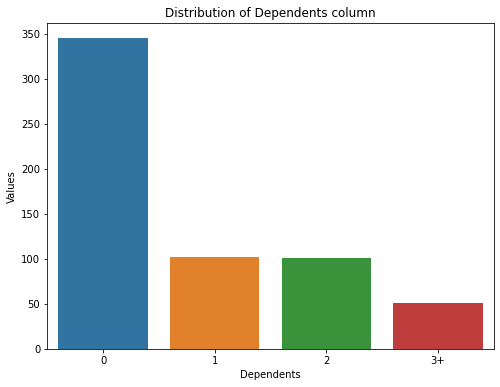

In [17]:
#plotting graph to show the value counts of Dependents column

plt.figure(figsize=[8,6])
sns.countplot(x='Dependents', data=df)
plt.ylabel('Values')
plt.xlabel('Dependents')
plt.title('Distribution of Dependents column')
plt.show()

As we checked the number of dependents is 0 for most of the applicants, so we'll replace the missing values as 0 dependents.

In [18]:
# Replacing the missing values

df['Dependents'].fillna('0', inplace=True)

4. Self_Employed

We'll replace the missing values of the Self_Employed column with the mode value.

In [19]:
# Checking for the values counts.

df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

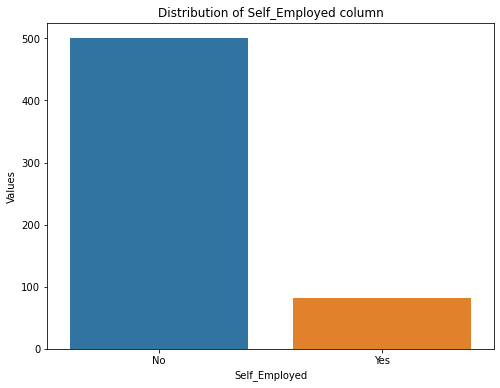

In [20]:
#plotting graph to show the value counts of Self_Employed column

plt.figure(figsize=[8,6])
sns.countplot(x='Self_Employed', data=df)
plt.ylabel('Values')
plt.xlabel('Self_Employed')
plt.title('Distribution of Self_Employed column')
plt.show()

As we checked the number of self employed applicants is less, so we'll replace the missing values with 'No'

In [21]:
# Replacing the missing values.

df['Self_Employed'].fillna('No', inplace=True)

5. LoanAmount

We'll replace the missing values of LoanAmount column with the mean value.

In [22]:
# Checking for the mean

df['LoanAmount'].mean()

146.41216216216216

In [23]:
# Replacing the missing values with the mean value.

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

6. Loan_Amount_Term

We'll replace the missing values of the Loan_Amount_Term column with the median value.

In [24]:
# Checking for the mean.

df['Loan_Amount_Term'].median()

360.0

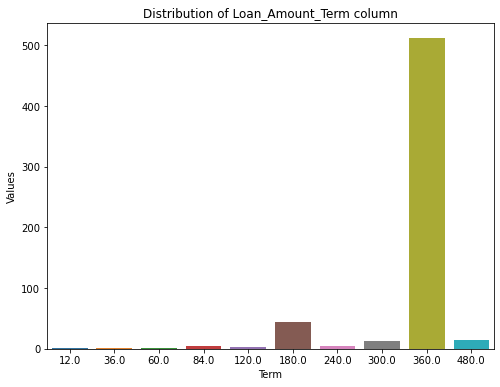

In [25]:
#plotting graph to show the value counts of Loan_Amount_Term column

plt.figure(figsize=[8,6])
sns.countplot(x='Loan_Amount_Term', data=df)
plt.ylabel('Values')
plt.xlabel('Term')
plt.title('Distribution of Loan_Amount_Term column')
plt.show()

In [26]:
# Replacing the missing values with the median

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

7. Credit_History

we'll replace the missing values of Credit_History column with the mode.

In [27]:
# Checking for the value count.

df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

As checked, most of the applicant has the Credit_History as 1.0. So, we'll replace the missing values with 1.0

In [28]:
# Replacing the missing values.

df['Credit_History'].fillna('1.0', inplace=True)

In [29]:
# Checking for the missing values again:

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- We've successfully removed all the missing values from the dataset.

#### Label encoding the categorical variables:

In [30]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

variables = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for v in variables:
    df[v] = LE.fit_transform(df[v])

In [31]:
# Checking for the dataset after Labelencoding.

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


#### Checking for the data distribution among all the columns:

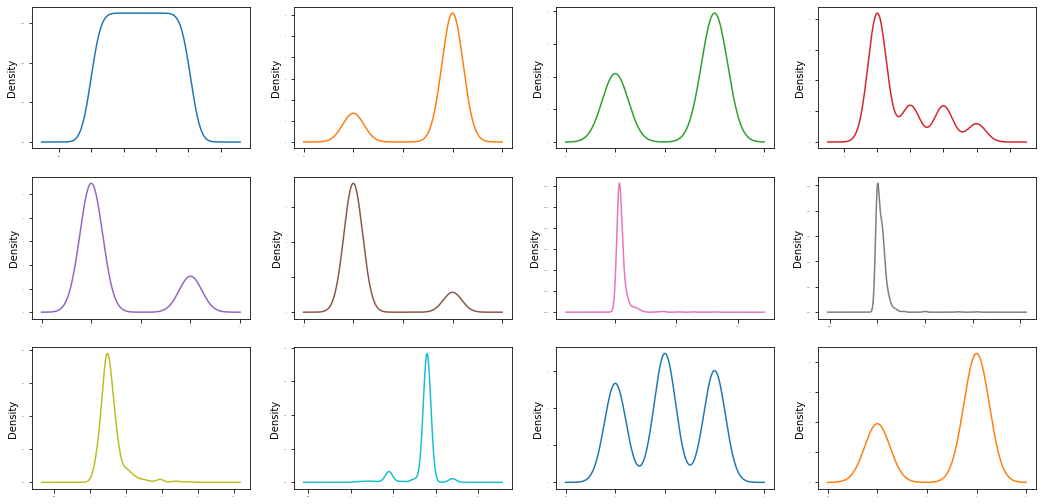

In [32]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

- It shows skewness in the dataset, which we'll handle later.

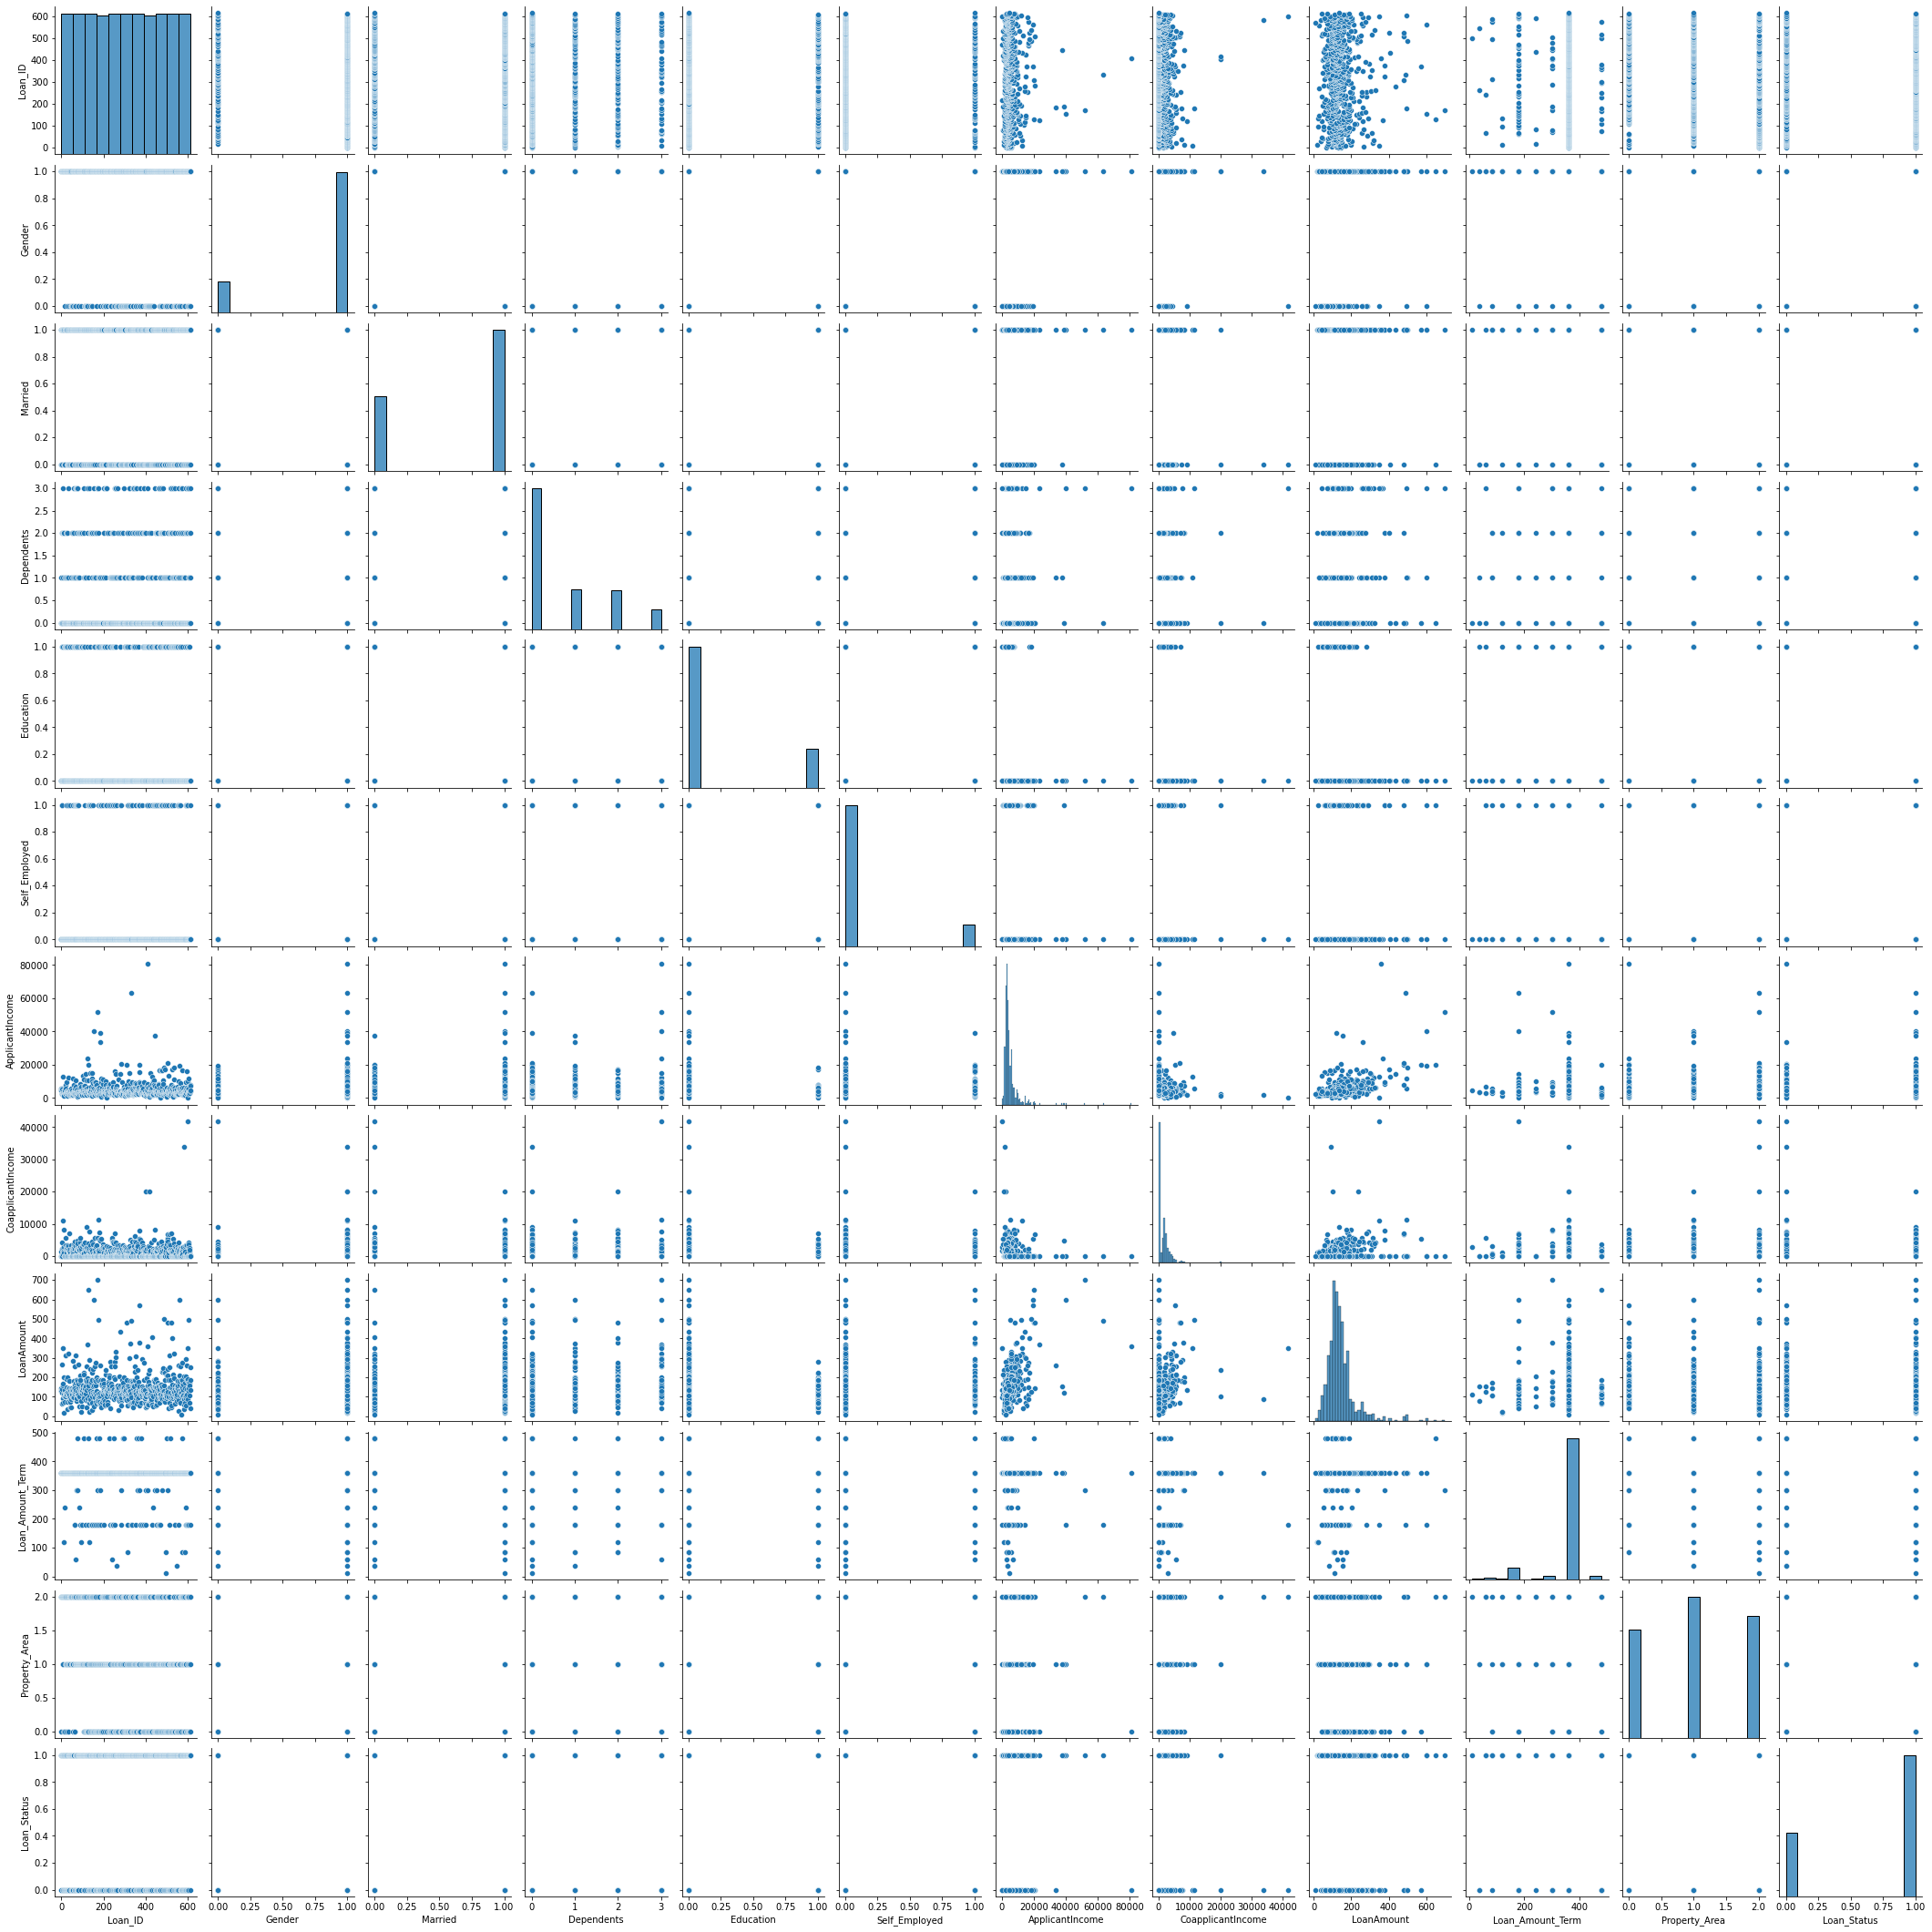

In [33]:
#Plotting pairplot

sns.pairplot(df)
plt.show()

#### Checking for the Statistical Summary:

In [34]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,1.000000


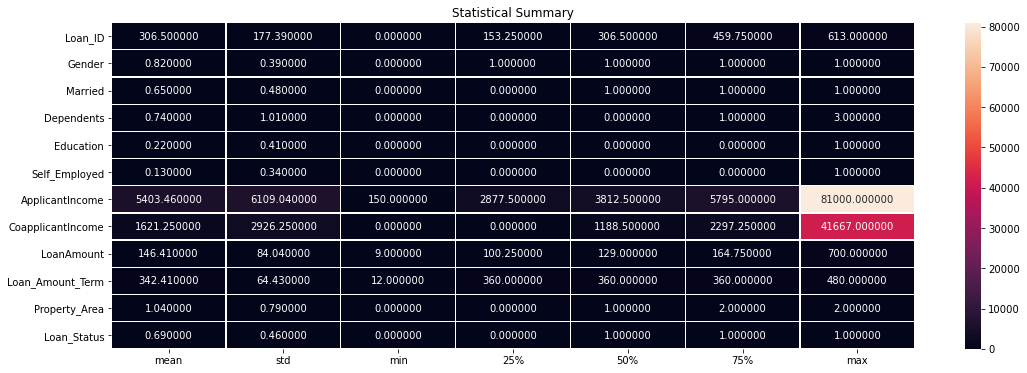

In [35]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[18,6])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

#### Checking for the Correlation of the variables:

In [36]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.076120,-0.022549


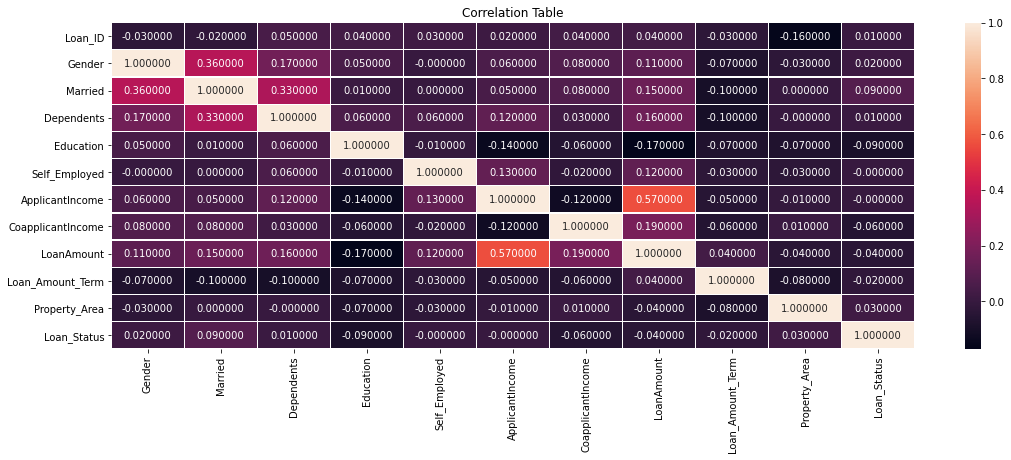

In [37]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[18,6])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

#### Outcomes of correlation table:

- Loan_ID has 1% correlation with the target column.
- Gender has 2% correlation with the target column.
- Married has 9% correlation with the target column.
- Dependents has 1% correlation with the target column.
- Education has -9% correlation with the target column which can be considered as weak bond.
- Self_Employed has 0% correlation with the target column.
- ApplicantIncome has 0% correlation with the target column.
- CoapplicantIncome has -6% correlation with the target column which can be considered as weak bond.
- LoanAmount has -4% correlation with the target column.
- Loan_Amount_Term has -2% correlation with the target column.
- Property_Area has 3% correlation with the target column.

#### Outliers Analysis:

We're checking the outliers only for the numerical features:

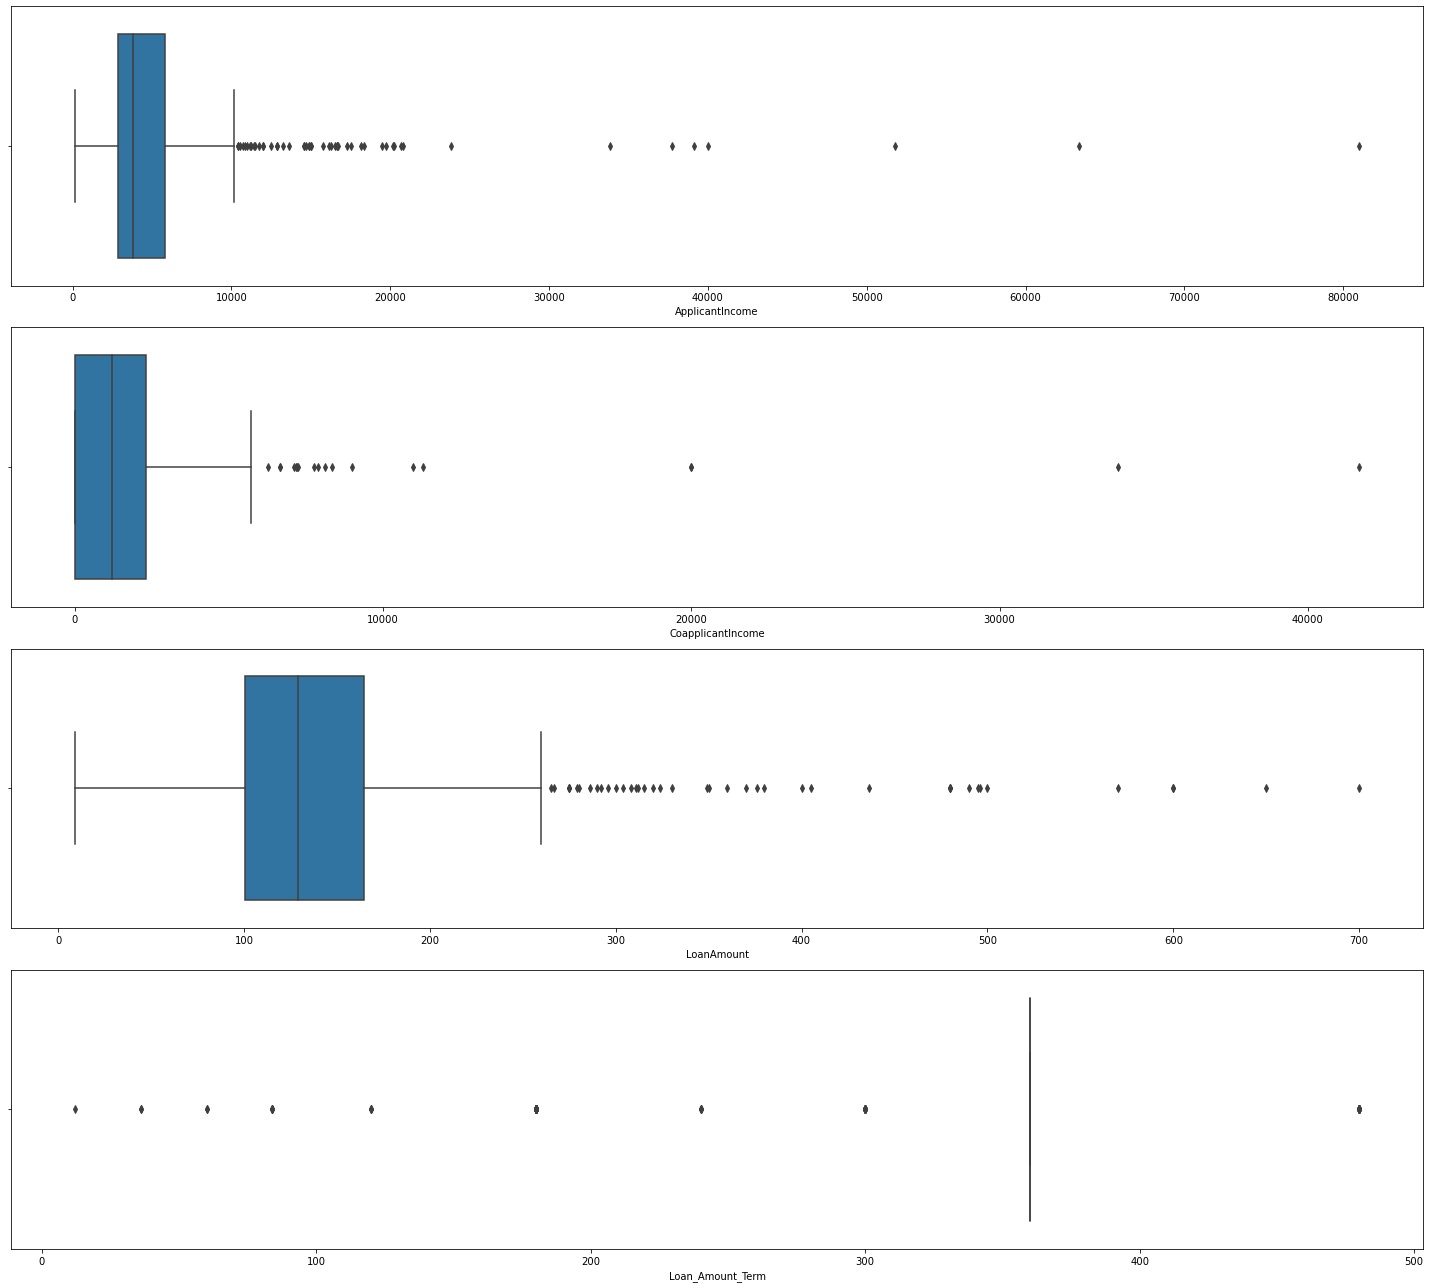

In [38]:
# Plotting boxplot to check the outliers in the dataset:

fig, axs = plt.subplots(4, figsize = (20,18))
plt1 = sns.boxplot(df['ApplicantIncome'], ax = axs[0], orient='v')
plt2 = sns.boxplot(df['CoapplicantIncome'], ax = axs[1], orient='v')
plt3 = sns.boxplot(df['LoanAmount'], ax=axs[2], orient='v')
plt4 = sns.boxplot(df['Loan_Amount_Term'], ax = axs[3], orient='v')


plt.tight_layout()

#### Outcomes of the boxplot:

- Outliers are present in all the numerical feature columns of the dataset.

#### Skewness:

In [39]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

- Skewness is present in all columns of the dataset.


### Data Cleaning:

Power transform technique.

In [40]:
# Splitting the dataset into independent and dependent variables:

x = df.drop(["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"], axis=1) #dropping the categorical and target columns.
y = df["Loan_Status"]

In [41]:
# Removing the skewness using the power transform

from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[ 0.5443313 , -1.10283684,  0.23538679,  0.17554004,  0.41173269],
       [ 0.17097382,  0.75057774, -0.0376586 ,  0.17554004,  0.41173269],
       [-0.49995512, -1.10283684, -1.34630531,  0.17554004,  0.41173269],
       ...,
       [ 1.02348683,  0.20860307,  1.37240931,  0.17554004,  0.41173269],
       [ 0.93175029, -1.10283684,  0.73892362,  0.17554004,  0.41173269],
       [ 0.17097382, -1.10283684,  0.03993645,  0.17554004, -2.42876026]])

#### Standard Scaler:

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[ 0.5443313 , -1.10283684,  0.23538679,  0.17554004,  0.41173269],
       [ 0.17097382,  0.75057774, -0.0376586 ,  0.17554004,  0.41173269],
       [-0.49995512, -1.10283684, -1.34630531,  0.17554004,  0.41173269],
       ...,
       [ 1.02348683,  0.20860307,  1.37240931,  0.17554004,  0.41173269],
       [ 0.93175029, -1.10283684,  0.73892362,  0.17554004,  0.41173269],
       [ 0.17097382, -1.10283684,  0.03993645,  0.17554004, -2.42876026]])

#### Handling data imbalance by oversampling:

In [43]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [44]:
#Checking the value count of the target column after oversampling
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

- We can see that the target column is now balanced.

#### Finding best RandomState:

In [63]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7867298578199052  on Random_State  298


#### Data Preproccessing:

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.25, random_state=298)

### Model Training:

#### LogisticRegresssion:

In [65]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test, predlr))

0.7867298578199052
[[ 65  42]
 [  3 101]]
              precision    recall  f1-score   support

           0       0.96      0.61      0.74       107
           1       0.71      0.97      0.82       104

    accuracy                           0.79       211
   macro avg       0.83      0.79      0.78       211
weighted avg       0.83      0.79      0.78       211



- From LogisticRegression, we're getting 79% accuracy score.

#### RandomForestClassifier:

In [66]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predrf = RF.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.7914691943127962
[[89 18]
 [26 78]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       107
           1       0.81      0.75      0.78       104

    accuracy                           0.79       211
   macro avg       0.79      0.79      0.79       211
weighted avg       0.79      0.79      0.79       211



From RandomForestClassifier, we're getting 79% accuracy score.

#### DecisionTreeClassifier:

In [67]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
preddt = DT.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7488151658767772
[[84 23]
 [30 74]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       107
           1       0.76      0.71      0.74       104

    accuracy                           0.75       211
   macro avg       0.75      0.75      0.75       211
weighted avg       0.75      0.75      0.75       211



From DecisionTreeClassifier, we're getting 75% accuracy score.

#### SVC

In [68]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7677725118483413
[[63 44]
 [ 5 99]]
              precision    recall  f1-score   support

           0       0.93      0.59      0.72       107
           1       0.69      0.95      0.80       104

    accuracy                           0.77       211
   macro avg       0.81      0.77      0.76       211
weighted avg       0.81      0.77      0.76       211



From SVC, we're getting 77% accuracy score.

- Now, we'll check the cross validation score of all the models to decide best fit model.

In [69]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.809462881514061


In [70]:
#Checking cross validation score of RandomForest Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForestClassifier is ',scr.mean())

Cross validation score for RandomForestClassifier is  0.7801146208183394


In [71]:
#Checking cross validation score of DecisionTree Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(DT,x,y,cv=5)
print('Cross validation score for DecisionTree Classifier is ',scr.mean())

Cross validation score for DecisionTree Classifier is  0.7085032653605225


In [72]:
#Checking cross validation score of SVC:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is ',scr.mean())

Cross validation score for SVC is  0.8078368652538984


#### Selecting the best fit model:

- As the minimum diffrence between the accuracy score and cross validation score is minimum for RandomForestClassifier (1.13), so the best fit model is RandomForestClassifier

#### Hyper parameter tuning:

In [81]:
from sklearn.model_selection import GridSearchCV

#RandomForestClassifier
parameters = {'n_estimators': [200,700], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion':['gini', 'entropy']}

In [82]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [85]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 700}

In [88]:
model = RandomForestClassifier(criterion='gini', max_features='log2', n_estimators =700)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))

79.62085308056872
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       107
           1       0.80      0.78      0.79       104

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.80      0.80       211



After hyper parameter tuning, we got 80% accuracy score.

### AUC ROC Curve:

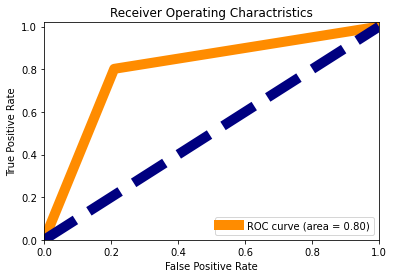

In [89]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

#### Saving the model:

In [90]:
import pickle
filename = 'loan_application_status.pkl'
pickle.dump(model, open(filename, 'wb'))

### Conclusion:

In [91]:

a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1,0
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
206,0,1
207,0,0
208,0,0
209,1,1
